In [ ]:
cd /content/drive/MyDrive/data/EasyOCR

/content/drive/MyDrive/data/EasyOCR


In [ ]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47.6 MB 1.8 MB/s 
     |████████████████████████████████| 604 kB 73.5 MB/s 
     |████████████████████████████████| 120 kB 69.4 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
import cv2
import re
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow
import easyocr

In [ ]:
# dataset = pd.read_csv('test.csv')[256:269]
dataset = pd.read_csv('./test/test.csv')
img_size = 50

In [ ]:
def pre_processing(img):
  img = cv2.medianBlur(img, 5)
  horizontal = True
  if img.shape[1] > img.shape[0]:
    img = cv2.resize(img, dsize=(0, 0), fx=img_size/img.shape[0], fy=img_size/img.shape[0], interpolation=cv2.INTER_AREA)
  else:
    horizontal = False
    img = cv2.resize(img, dsize=(0, 0), fx=img_size/img.shape[1], fy=img_size/img.shape[1] * 2, interpolation=cv2.INTER_AREA)
  
  return img, horizontal

In [ ]:
def post_processing(text):
  while '  ' in text:
    text = text.replace('  ', ' ')

  num_blank = text.count(' ')
  if num_blank * 2 + 1 == len(text):
    text = text.replace(' ', '')
  return text

In [ ]:
def recognize(src, reader, horizontal):
  cv2_imshow(src)
  results = []

  # for img in [src] + list(cv2.split(src)):
  for img in [src]:
    if horizontal:
      result = reader.readtext(img, batch_size=64)
    else:
      result = reader.readtext(img, batch_size=64, link_threshold=1, ycenter_ths=0)
    total_confidence = 0
    total_area = 0
    merged_text = []

    last_pos = 0
    for pos, text, confidence in sorted(result, key=lambda x: x[0][0][0 if horizontal else 1]):
      (tl, tr, br, bl) = pos
      tl = (int(tl[0]), int(tl[1]))
      br = (int(br[0]), int(br[1]))
      if horizontal:
        if tl[0] < last_pos:
          break
        else:
          last_pos = br[0]
      # else:
      #   if tl[1] < last_pos:
      #     break
      #   else:
      #     last_pos = br[1]
      img = cv2.rectangle(img, tuple(map(int, tl)), tuple(map(int, br)), (0, 0, 0), 2)

      # print(f'text : {text}, score : {confidence}')
      merged_text.append(text)
      total_confidence += confidence
      total_area += abs(tl[0] - br[0]) * abs(tl[1] - br[0])
    else:
      merged_text = ' '.join(merged_text)
      mean_confidence = total_confidence / len(result) if len(result) != 0 else 0
      
      results.append((mean_confidence * total_area, merged_text))
    # cv2_imshow(img)

  # results.sort(key=lambda x: (x[0] >= 0.99, len(x[1].replace(' ', '')), x[0]))
  results.sort()
  result_text = results[-1][1] if results else ''
  # print(f'final result : {result_text}')
  return result_text

In [ ]:
# boxes = reader.detect(img)
# text = ''
# for coords in boxes[0][0]:
#   x_min, x_max, y_min, y_max = map(lambda x: max(0, x), coords)
#   img = source[y_min:y_max, x_min:x_max]
#   cv2_imshow(img)

 가각간갈감갑갓갔강같개객갤걀거걱건걷걸검겁것겅게겐겔겠겨격견결겹겼경곁계고곡곤곧골곰곱곳공과곽관광괘괜괴교구국군굴굽굿궁궈권귀귓규귝균그극근글금급긋긍기긴긷길김깃깊까깐깔깜깥깨꺼껍께꼬꼭꼰꼴꼼꽁꽂꽃꾸꾼꿀꿈꿔뀐끄끈끌끓끔끝끼나낙낚난날남납낫낭낮낯낳내낵낸냄냈냉냐냠냥너넌널넓넘넙넝넣네넥넬넷녀년념녕노녹논놀농높놓놔뇌뇨뇽누눈눔뉴느는늘늙능니닉닌닐님닙닛닝다닥단닫달닭닮담답닷당대댁댄댕더덕던덟덤덩덮데덴델뎀뎃뎅도독돈돌돔동돼되된될됩두둑둔둘둠둥뒤뒷듀드득든듣들듦듬듯등디딕딘딜딥딧딩따딱딴딸땅때땡떙떠떡떤떨떳떻떼또똘뚜뚝뚫뚱뛰뜨뜰뜸뜻띠라락란랄람랍랐랑래랙랜램랩랫랬랭략량러럭런럴럼럽럿렁렇레렉렌렐렘렙렛려력련렬렵령례로록론롤롬롭롯롱뢰료룡루룩룸룹룻류륜률륨르른를름릇릉리릭린릴림립릿링마막만많말맑맘맙맛망맞매맥맨맴맵맹맺머먹먼멀멈멋멍메멘멜멧며면멸명몇모목몬몰몸못몽묘무묵문묻물뭄뭉뭐뭔뮈뮤므미믹민믿밀밌밍및바박밖반받발밝밤밥밧방밭배백밴밸뱃뱅버번벌범법벗벚베벡벤벧벨벼벽변별볍병보복볶본볼봄봇봉봐봤뵙부북분불붉붐붓붕붙뷔뷰브븐블비빅빈빌빔빗빙빛빠빡빨빵빼뻐뻔뻘뻬뼈뽀뽁뽈뽑뽕뿌쁘쁜쁠쁨삘사삭산살삶삼삽상새색샌샐샘생샤샨샬샵샷샹샾서석선설섬섭섯성세섹센셀셉셋셔션셜셨셰셸소속손솔솜솝솟송솥쇄쇠쇼숍수숙순술숨숫숭숯숲숴쉐쉬쉴쉼쉽쉿슈슉슐스슨슬슴습승시식신실싫심십싯싱싶싸싼쌀쌈쌍쌤써썬썰썸썹쎄쎈쎼쏘쏠쏭쑝쓰쓴쓸씀씨씩씬씹씻씽아악안않알앓암압앗았앙앞애액앤앰앵야약얀얄양어억언얻얼엄업없엇었엉엌에엑엔엘엠엣여역엮연열염엽엿였영옆예옙옛오옥온올옮옳옴옵옷옻와왁완왓왔왕왜외요욕용우욱운울움웃웅워원월웠웨웰웹위윈윌윗윙유육윤율융으은을음응의이익인일읽잃임입잇있잉잊잎자작잔잖잘잠잡장재잭잼쟁쟈저적전절점접정제젝젠젤젬져젼졌조족존졸좀좁종좋좌죄죠주죽준줄줍중줘쥐쥬즈즉즌즐즘즙증지직진짇질짐집짓징짚짜짝짧짬짱째쩐쩡쪽쫄쫌쭈쭌쯤찌찜찢차착찬찮찰참찹찻창찾채책챌챔챙처척천철첨첩첫청체첸쳐초촌촛총촬최쵸추축춘출춤춧충취츄츠측층치칙친칠칡침칭카칵칸칼캇캉캐캔캘캠캡캣캬커컨컬컴컵컷케켄켈켐켑켓켜코콕콘콜콤콩쾌쿄쿠쿡쿤쿨쿱퀘퀴퀵퀸퀼큐큘크큰클큼키킥킨킬킴킹타탁탄탈탉탐탑탕태택탠탭터턱턴털텀텅테텍텐텔템토톡톤톨톰통퇴투툰툴퉁튀튜튤튬트특튼틀틈티틱틴틸팀팅파팍판팔팜팝팡팥패팩팬팰팽퍼펀펌펍페펙펜펠펫편평폐포폭폰폴폼

  0%|          | 0/3669 [00:00<?, ?it/s]

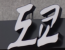

오


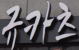

성


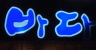

대성


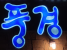

정


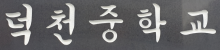

한심하


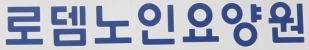

우구성


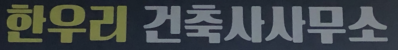

성사사스


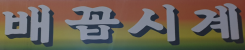

가


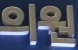

의


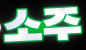

우


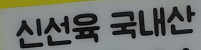

성리


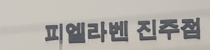

서 의정의


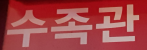

우


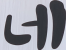

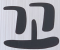

기의


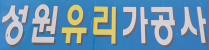

성상리지


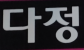

대


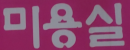

이


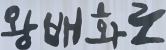

정이


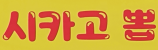

사교


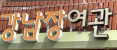

정


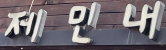

자


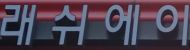

하


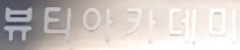

유의


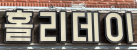

독리


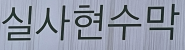

심사우


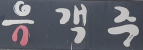

정


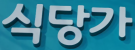

의


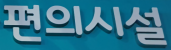

정의사


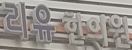

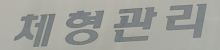

서


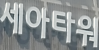

세


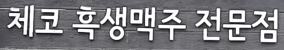

하 의공 정


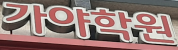

유


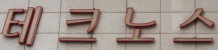

심


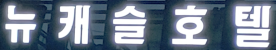

김


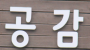

플


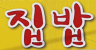

하


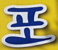

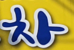

정


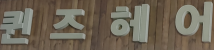

정하


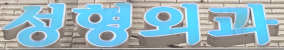

우


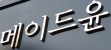

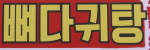

세


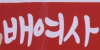

세


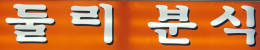

플리


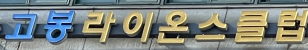

유교국


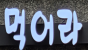

세


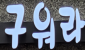

하


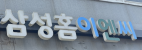

성


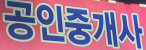

일


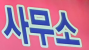

세


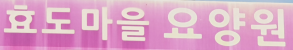

우국리


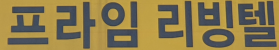

우리학


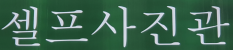

성수사정


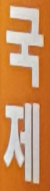

의의


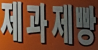

세지서


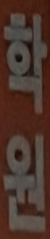

의의


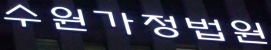

우정영


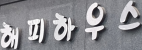

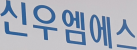

신정


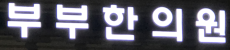

유의성


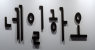

이


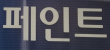

세


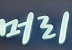

식


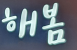

바


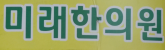

이하인의


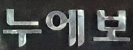

유이의


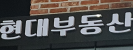

진의


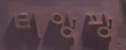

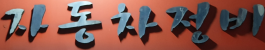

지우하


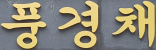

주하


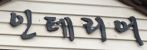

정


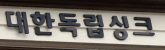

정


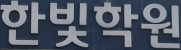

인인


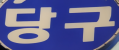

부


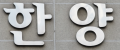

한


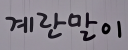

하인


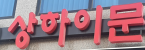

심성성


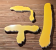

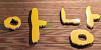

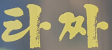

리지


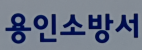

정인스


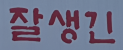

정


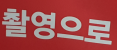

정


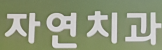

자


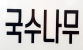

정


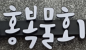

정


KeyboardInterrupt: ignored

In [ ]:
pred = []
reader = easyocr.Reader(['competition'], gpu=True,
                    model_storage_directory='model/',
                    user_network_directory='user_network/',
                    recog_network='competition')
print(''.join(map(str, sorted(list(reader.lang_char)))))
print(len(reader.lang_char))

for i, img_path in enumerate(tqdm(dataset.img_path)):
  # print('-' * 10, f'case #{i}', '-' * 10)
  img = cv2.imread(img_path)
  img, horizontal = pre_processing(img)
  text = recognize(img, reader, horizontal)
  text = post_processing(text)
  print(text)
  pred.append(text)

In [ ]:
submit = pd.read_csv('./sample_submission.csv')
submit['text'] = pred
submit.to_csv('./submit_8(1).csv', index=False, encoding="utf-8-sig")

In [ ]:
len(pred)

3669

In [ ]:
before = pd.read_csv('./submit_8.csv')
after = pd.read_csv('./submit_8(1).csv')

In [ ]:
before_pred = before['text']
after_pred = after['text']

In [ ]:
for i, (be, af) in enumerate(zip(before_pred, after_pred)):
  if be != af:
    print(i, be, af)

2 따 어온
3 촬경 미경
7 배 꿈시계 배프시계
13 네 nan
23 분티이가다 분티아카 데디
29 nan nan
33 꽉이함원 로이견원
38 표 포
41  하의과 장반 불와문트
42 nan nan
43 뼈다귀랑 뼈다귀량
45 둘리 분식 물리 분식
46 무통다 이온스클럽 킬훈다 이온스클럽
49 심성용이언 심성용기다  
55 개 국제
56 제과제빵 제과제망
57 의원 학원
59 nan nan
63 폐인트 페인트
69 nan nan
70 가동사성비 가 동사 웬비
72 인돼리어 인돼리러
73 미안독림생 모안독림성
78 상하어문 스의흐문
79 nan nan
80 nan nan
87 홍부물호 홍부물요
93 대 다
94 변승변송 보승보송
113 화 기업 금 화기업금
116 기 양갈비
121 땜기논 땜기는
125 피 프
126 어문미터 논리터
132 세사리방 사리번
137 콩 nan
142 nan nan
145 살 우  살우꿀
147 nan nan
148 활림한 의원 출태한 의원
150 손뚜껑삼계실 왕솥뚜껑삼겨살
151 네연 네역
152 부 할머니 부탕캠예
156 문승 문숨
159 원편지 원전지
161 면웬 개웬
163 nan nan
164 칠보당 질 모팅
166 라디 나라디
168 뉴이 부동산
181 알뜰끈 알플끈
190 제에다 운 셋종녁 운
193 다냐 따아
198 시 nan
199 디얼니 도파니
207 보리밥 보 리밥
211 우려회 우렇회
214 아우리 아운로
219 가위와화 빚 기울요 빚
228 대학로 대합로
229 nan nan
230 졸리졸리 돌리졸 턱
241 점애스 점쟁애스
245 한부공방 한복공방
247 평죽사 정건숙사
249 에영금속 배영금속
252 약 자
255 용지수 홍지수
257 성겨테한바들벼기원 성겨근한바이벼이원
258 차이나 힘
259 바댐 뽑
260 부동신 부동산
262 로마양복점 로마흥
266 봄타이 설텅타이
267 칼텅 값탕
268 nan nan
269 배오 배상
271 전탑 팀중방
274 nan nan
275 붓 nan
276 사라오 가화